# Preparação do ambiente

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from tabulate import tabulate

## Constantes e funções auxiliares

In [2]:
FILE_AMAZON_CLEAN_TARGETS = '../datasets/regulatron_legacy/clean/amazon_clean_targets.parquet'

# Carga e prepação dos dados

In [3]:
df_amazon_clean_targets = pd.read_parquet(FILE_AMAZON_CLEAN_TARGETS)

unique_targets = df_amazon_clean_targets.target.value_counts().index
map_targets_name_to_int = {target:i for i,target in enumerate(unique_targets)}
map_targets_int_to_name = {k:v for v,k in map_targets_name_to_int.items()}

df_amazon_clean_targets['target_int'] = df_amazon_clean_targets['target'].map(map_targets_name_to_int)

df_amazon_clean_targets

,Link,nome,descricao,cat_full,target,target_int
0,https://www.amazon.com.br/Especiais-Cinematic-...,filtro lente efeitos especiais blue streak cam...,modelo aplicavel filtro listras azuis adequado...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
1,https://www.amazon.com.br/Motores-Escova-Conju...,motores escova 4 conjuntos motores escova dron...,fonte alimentacao motor escova drone rc suport...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
2,https://www.amazon.com.br/Armazenamento-Protet...,bolsa armazenamento protetora drone capa rigid...,valvula alivio pressao equipada valvula equili...,Brinquedos e Jogos|Brinquedos de Controle Remo...,Outros,0
3,https://www.amazon.com.br/EQUSS-V-strom-Motoci...,equss ducati dl650 dl1000 v-strom dl 650 1000 ...,super grip design criativo quatro suportes sao...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
4,https://www.amazon.com.br/remote-control-brush...,remote control car brushless motor servo kit r...,,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
...,...,...,...,...,...,...
51371,https://www.amazon.com.br/Fotografia-Quadcopte...,mini drone bolso hd folding fotografia aerea q...,experimente beleza mundo drone possui camera 6...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0
51372,https://www.amazon.com.br/YITRE-Carregador-Eme...,yitre mini carregador portatil 2 1 carregador ...,,Eletrônicos e Tecnologia|Celulares e Comunicaç...,Carregadores,3
51373,https://www.amazon.com.br/reforço-Amplificador...,kit reforco sinal kit reforco sinal amplificad...,,Computadores e Informática|Dispositivos de Con...,Dispositivos de Conexão em Rede,4
51374,https://www.amazon.com.br/Hosioe-Altitude-Qudc...,hosioe ls-xt6 rc drone mini drone 6 eixos gyro...,funcao cima baixo frente tras virar esquerda d...,Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...,Outros,0


In [4]:
df_amazon_clean_targets[df_amazon_clean_targets['nome'].str.contains('shuguo')]['cat_full'].unique()

array(['Eletrônicos e Tecnologia|Celulares e Comunicação|Acessórios|Manutenção e Reparos|Peças de Reposição|#NULO#',
       'Computadores e Informática|Acessórios|Cabos e Acessórios|Cabos|Cabos USB|#NULO#',
       'Eletrônicos e Tecnologia|Celulares e Comunicação|Acessórios|Manutenção e Reparos|Ferramentas e Acessórios de Chip|#NULO#'],
      dtype=object)

In [5]:
# X_outros = df_amazon_clean_targets[df_amazon_clean_targets['target_int']==0]['nome']
# y_outros = df_amazon_clean_targets[df_amazon_clean_targets['target_int']==0]['target_int']

# X = df_amazon_clean_targets[df_amazon_clean_targets['target_int']>0]['nome']
# y = df_amazon_clean_targets[df_amazon_clean_targets['target_int']>0]['target_int']

X = df_amazon_clean_targets['nome']
y = df_amazon_clean_targets['target_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=724)

# Experimentos

## Classificador base

In [12]:
base_classifier = {}

In [13]:
clf_dummy = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', DummyClassifier())])
clf_dummy.fit(X_train,y_train)
predicted = clf_dummy.predict(X_test)
base_classifier['Dummy'] = np.mean(predicted == y_test)
base_classifier['Dummy']

0.5765337900965432

In [14]:
clf_nb = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
clf_nb.fit(X_train,y_train)

predicted = clf_nb.predict(X_test)
base_classifier['MultinomialNB'] = np.mean(predicted == y_test)
base_classifier['MultinomialNB']

0.7643257552164435

In [15]:
clf_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

clf_sgd.fit(X_train, y_train)
predicted = clf_sgd.predict(X_test)
base_classifier['SGDClassifier'] = np.mean(predicted == y_test)
base_classifier['SGDClassifier']

0.8006072874493927

In [16]:
clf_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=15, random_state=42)),
])

clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
base_classifier['DecisionTreeClassifier'] = np.mean(predicted == y_test)
base_classifier['DecisionTreeClassifier']

0.770242914979757

In [17]:
clf_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1, random_state=42)),
])

clf_rf.fit(X_train, y_train)
predicted = clf_rf.predict(X_test)
base_classifier['RandomForestClassifier'] = np.mean(predicted == y_test)
base_classifier['RandomForestClassifier'] 

0.5765337900965432

In [18]:
weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)
n_estimators = 300
clf_ada = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,))])

clf_ada.fit(X_train, y_train)
predicted = clf_ada.predict(X_test)
base_classifier['AdaBoostClassifier'] = np.mean(predicted == y_test)
base_classifier['AdaBoostClassifier'] 

0.7269542198691996

In [32]:
base_classifier

{'Dummy': 0.5765337900965432,
 'MultinomialNB': 0.7643257552164435,
 'SGDClassifier': 0.8006072874493927,
 'DecisionTreeClassifier': 0.770242914979757,
 'RandomForestClassifier': 0.5765337900965432,
 'AdaBoostClassifier': 0.7269542198691996}

In [44]:
df_base_classifier = pd.DataFrame.from_dict(base_classifier,orient='index', columns=['Accuracy'])
df_base_classifier = df_base_classifier.sort_values(by='Accuracy',ascending=False)
df_base_classifier

,Accuracy
SGDClassifier,0.800607
DecisionTreeClassifier,0.770243
MultinomialNB,0.764326
AdaBoostClassifier,0.726954
Dummy,0.576534
RandomForestClassifier,0.576534


## Palavras mais relevantes

Palavras mais relevantes para o melhor classificador (SGDClassifier)

In [45]:
vect = TfidfVectorizer(min_df=5,ngram_range=(1,1))
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)

clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf.fit(X_train_tfidf,y_train)
predicted = clf.predict(X_test_tfidf)
np.mean(predicted == y_test)

0.8074587355963874

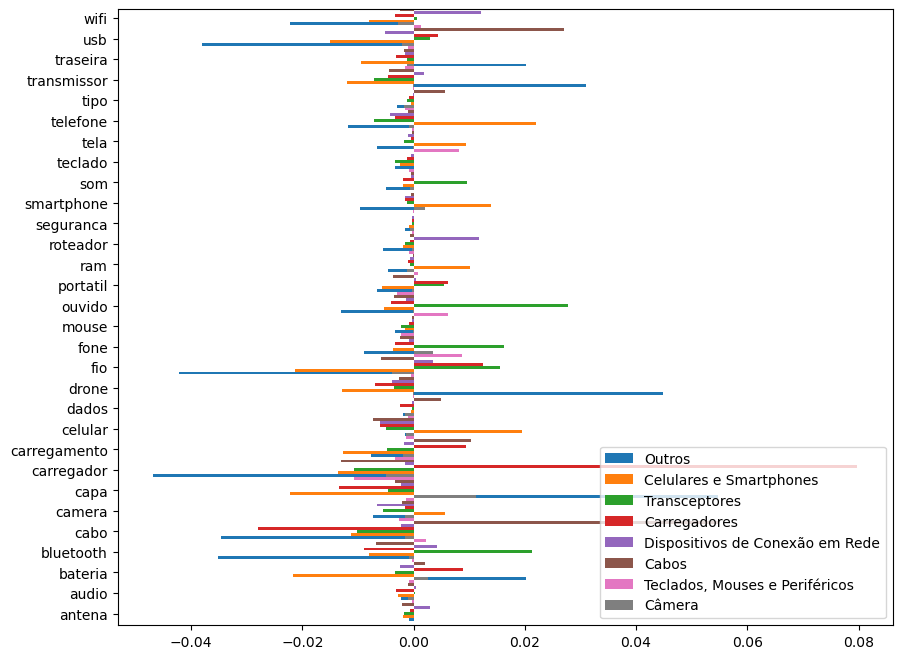

In [46]:
import matplotlib.pyplot as plt

average_feature_effects = clf.coef_ * np.asarray(X_train_tfidf.mean(axis=0)).ravel()
feature_names = vect.get_feature_names_out()
target_names = list(map_targets_name_to_int.keys())

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# plot feature effects
bar_size = 0.25
padding = 0.75
y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

fig, ax = plt.subplots(figsize=(10, 8))
for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i - 2) * bar_size,
        average_feature_effects[i, top_indices],
        height=bar_size,
        label=label,
    )
ax.set(
    yticks=y_locs,
    yticklabels=predictive_words,
    ylim=[
        0 - 4 * bar_size,
        len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
    ],
)
ax.legend(loc="lower right");

In [47]:
top

,Outros,Celulares e Smartphones,Transceptores,Carregadores,Dispositivos de Conexão em Rede,Cabos,"Teclados, Mouses e Periféricos",Câmera
0,capa,telefone,ouvido,carregador,wifi,cabo,fio,camera
1,drone,celular,bluetooth,fio,roteador,usb,teclado,wifi
2,transmissor,smartphone,fone,carregamento,bluetooth,carregamento,mouse,fio
3,traseira,ram,fio,bateria,fio,tipo,bluetooth,audio
4,bateria,tela,som,portatil,antena,dados,usb,seguranca
